In [ ]:
from scipy.spatial import distance
a = (1,2)
b = (3,4)

distance.euclidean(a, b)

2.8284271247461903

In [ ]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/frankbruni/27f12f10e04e718f60f094020c2ef159/raw/c5a6aff7f444c8d0be98e219c576a438d459f63d/FantasyPros_2021_Overall_NBA_Rankings.csv')

num_teams = 12
num_roster_spots = 13
draft_pool = num_teams * num_roster_spots

df = df[:draft_pool]
print(df.shape)
df.tail()


(156, 8)


,Rank,Player,Team,Positions,Best,Worst,Avg,Std Dev
151,152,Seth Curry,BKN,"PG,SG DTD",117,192,153.8,16.4
152,153,Dorian Finney-Smith,DAL,"SF,PF DTD",110,196,154.1,25.4
153,154,Desmond Bane,MEM,"PG,SG,SF",111,211,155.8,30.8
154,155,Danilo Gallinari,ATL,"SF,PF DTD",137,189,157.8,14.5
155,156,Aleksej Pokusevski,OKC,"SF,PF DTD",119,174,146.0,17.4


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; sns.set_style('whitegrid')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

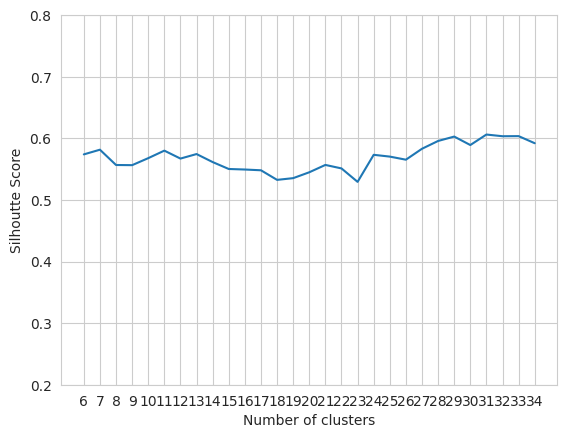

In [ ]:
avgs = []


start = 6
stop = 35

for n_clusters in range(start, stop):

    X = df[['Avg']].values

    model = KMeans(n_clusters = n_clusters)

    model.fit(X)

    labels = model.predict(X)

    silhouette_avg = silhouette_score(X, labels)

    avgs.append(silhouette_avg)

plt.plot(np.arange(start, stop, 1), avgs);
plt.xlabel('Number of clusters');
plt.ylabel('Silhoutte Score');
plt.ylim(0.2,0.8);

plt.xticks(np.arange(start, stop, 1));

In [ ]:
pd.set_option('display.max_rows', None)

k = 31

model = KMeans(n_clusters=k)

model.fit(df[['Avg']].values)

labels = model.predict(X)

def assign_tiers(labels):

    unique_labels = []
    tiers = []

    for i in labels:

        if i not in unique_labels:
            unique_labels.append(i)


        tiers.append(
            len(set(unique_labels))
        )


    return tiers

tiers = assign_tiers(labels)

df['Tier'] = tiers

df.set_index('Tier').head(100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Rank,Player,Team,Positions,Best,Worst,Avg,Std Dev
Tier,,,,,,,,
1,1,Nikola Jokic,DEN,"PF,C DTD",1,3,1.2,0.6
1,2,Stephen Curry,GSW,"PG,SG DTD",1,5,2.5,0.9
1,3,James Harden,PHI,"PG,SG",2,6,3.1,1.1
2,4,Luka Doncic,DAL,"PG,SG DTD",1,17,5.8,4.2
2,5,Damian Lillard,POR,PG OUT,4,14,6.6,2.6
2,6,Karl-Anthony Towns,MIN,C DTD,4,15,6.9,2.9
2,7,Giannis Antetokounmpo,MIL,"PF,C DTD",4,12,7.1,2.4
2,8,Kevin Durant,BKN,"SF,PF",4,16,8.0,3.4
2,9,Jayson Tatum,BOS,"SF,PF DTD",5,12,8.3,2.2


In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('fivethirtyeight')

def make_clustering_viz(df, figsize =(10, 10)):


    colors = ['purple', 'magenta', 'red', 'blue', 'orange', 'green',
              'salmon', 'yellow', 'black', 'grey', '#3498db', '#16a085', '#f4d03f', '#f1948a',
              '#48c9b0', '#3498db', '#e74c3c', '#d7bde2', '#d0d3d4'
              ]

    colors = dict(zip(range(1, k+1), colors[:k]))

    plt.figure(figsize = figsize)


    plt.scatter(x = df['Avg'],
                y = df['Rank'],
                c = 'grey',
                alpha = 0.9,
                s = 50,
                zorder = 1000
              )

    yticks = []

    for _, row in df.iterrows():

          xmin = row['Best']
          xmax = row['Worst']

          ymin, ymax = row['Rank'], row['Rank']

          player = row['Player']

          tier = row['Tier']

          plt.plot((xmin, xmax), (ymin, ymax),  c = colors.get(tier, 'black'), alpha = 0.8)

          yticks.append(player)

    patches = []

    for tier, color in colors.items():
        patch = mpatches.Patch(color = color, label=f'Tier {tier}')
        patches.append(patch)


    plt.legend(handles =patches, borderpad = 1, fontsize = 12)


    plt.xlabel('Average Expert Rank', fontsize = 12)
    plt.ylabel('Expert consenus rank', fontsize = 12)
    plt.yticks(df['Rank'], yticks, fontsize = 12)

    plt.title('Tiers for the 2021 Draft. ECR vs. Average Expert Rank.', fontsize = 12)

    plt.gca().invert_yaxis()
    plt.show()






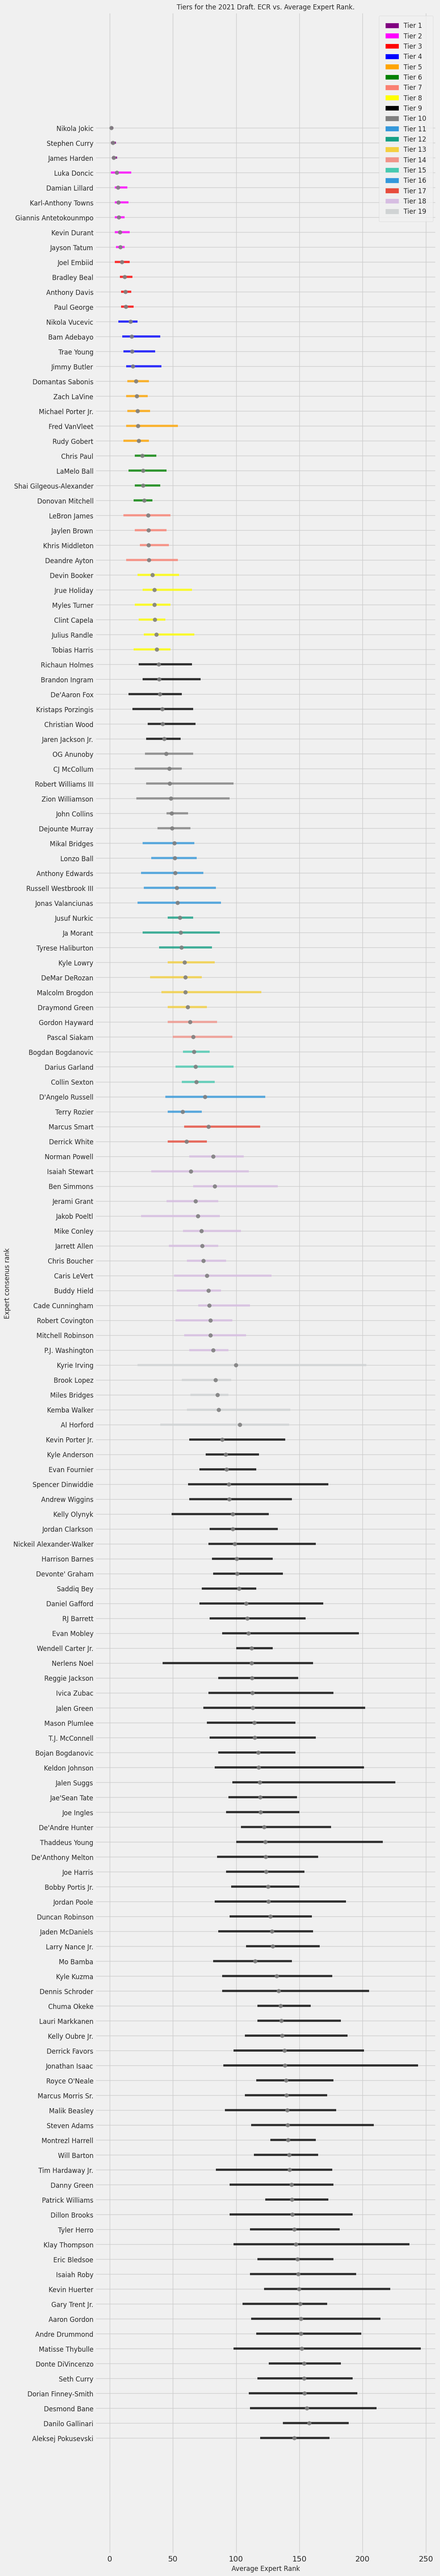

In [ ]:
make_clustering_viz(df, figsize=(10, 80))